In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time
import pickle
import os

pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)
pickle_in_1=open('y.pickle','rb')
y=pickle.load(pickle_in_1)

X = X/255.0

model = Sequential()
model.add(Conv2D(96, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
            
#for i in range(conv_layer-1):

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())    

#for i in range(dense_layer):
 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

r=model.fit(X, y, batch_size=20, epochs=10, validation_split=0.2) 
model.save('final_model.h5')
            
model.summary()            

Epoch 1/10
71/71 [==============================] - 44s 614ms/step - loss: 1.2869 - accuracy: 0.3544 - val_loss: 0.9735 - val_accuracy: 0.5694
Epoch 2/10
71/71 [==============================] - 50s 698ms/step - loss: 0.9155 - accuracy: 0.5800 - val_loss: 0.7059 - val_accuracy: 0.6827
Epoch 3/10
71/71 [==============================] - 49s 690ms/step - loss: 0.6849 - accuracy: 0.7136 - val_loss: 0.6615 - val_accuracy: 0.7082
Epoch 4/10
71/71 [==============================] - 48s 681ms/step - loss: 0.6922 - accuracy: 0.7166 - val_loss: 0.5661 - val_accuracy: 0.7734
Epoch 5/10
71/71 [==============================] - 49s 690ms/step - loss: 0.5335 - accuracy: 0.7842 - val_loss: 0.4938 - val_accuracy: 0.8244
Epoch 6/10
71/71 [==============================] - 53s 755ms/step - loss: 0.4385 - accuracy: 0.8168 - val_loss: 0.4757 - val_accuracy: 0.8499
Epoch 7/10
71/71 [==============================] - 50s 702ms/step - loss: 0.4183 - accuracy: 0.8420 - val_loss: 0.4653 - val_accuracy: 0.8470

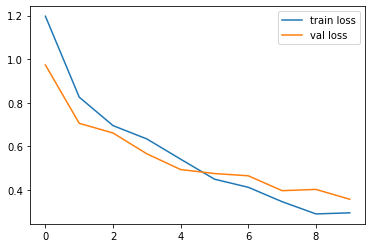

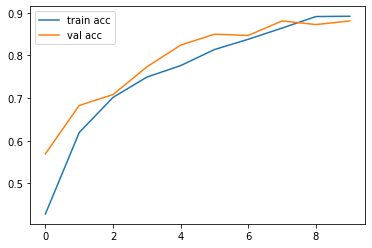

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

12/12 [==============================] - 2s 158ms/step - loss: 0.2001 - accuracy: 0.9462


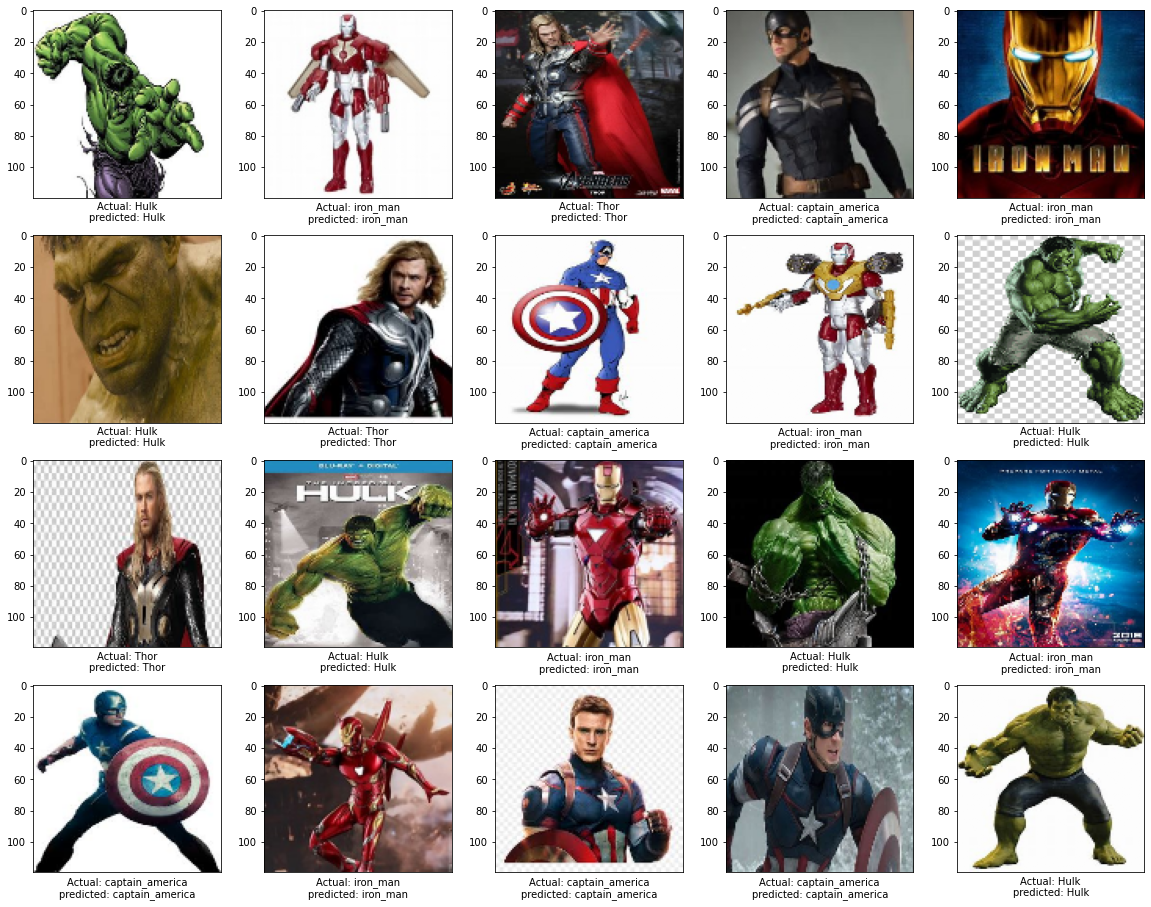

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

categories =['iron_man','Hulk','captain_america','Thor']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

model=tf.keras.models.load_model('final_model.h5')
model.evaluate(X_test,y_test, verbose=1)

prediction= model.predict(X_test)

plt.figure(figsize=(20,20))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])
    plt.xlabel('Actual: '+ categories[y_test[i]]+ '\n' + 'predicted: '+ categories[np.argmax(prediction[i])])
    plt.xticks([])
    
plt.show()